In [18]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /home/koz/koz/NYCDSA/bootcamp-resources/ML/Lab/E-Retailers


In [27]:
orders_file = pd.read_csv("./data/Orders.csv", low_memory = False)
returns_file = pd.read_csv("./data/Returns.csv")
orders = pd.DataFrame(orders_file)
returns = pd.DataFrame(returns_file)



In [23]:
orders_head = orders[:10]
orders_head

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.1,$763.28,897.35,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.0,$564.84,894.77,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.0,$996.48,878.38,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.0,$54.71,25.27,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.2,$5.48,11.13,High


In [8]:
orders.describe()
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [28]:
convert_to_numeric_dollars = lambda s: int(s.replace("$","").replace(".","").replace(",",""))/100

orders.Profit = orders.Profit.map(convert_to_numeric_dollars)
orders.Sales = orders.Sales.map(convert_to_numeric_dollars)
orders_head = orders[:10]
orders_head

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,897.35,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,894.77,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High


In [9]:
returns.describe()
returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [29]:
orders_head['Order.Date']

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
5     6/28/14
6     11/6/12
7     4/14/13
8    11/11/14
9      3/6/12
Name: Order.Date, dtype: object

In [32]:

make_date = lambda x: datetime.datetime.strptime(x,'%m/%d/%y')
orders.loc[:,'Order.Date'] = pd.to_datetime(orders.loc[:,'Order.Date'])
orders.loc[:,'Order.Month'] = orders.loc[:,'Order.Date'].apply(lambda x: x.month_name())
orders.loc[:,'Order.Month.Num'] = orders.loc[:,'Order.Date'].apply(lambda x: x.month)
orders.loc[:,'Order.Year'] = orders.loc[:,'Order.Date'].apply(lambda x: x.year)


<AxesSubplot:xlabel='Order.Month.Num'>

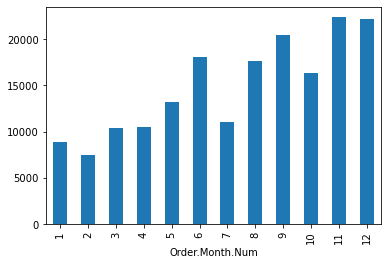

In [40]:
orders_by_month = orders.groupby('Order.Month.Num')
_ = orders_by_month['Quantity'].agg(sum)
_.plot.bar()

<AxesSubplot:xlabel='Order.Month.Num'>

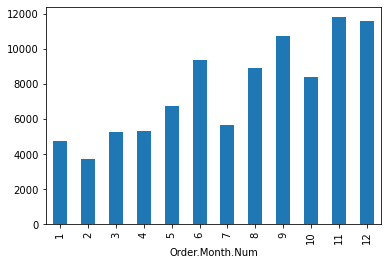

In [41]:
consumer_orders = orders[orders.Segment == "Consumer"]
consumer_orders_by_month = consumer_orders.groupby('Order.Month.Num')
_ = consumer_orders_by_month['Quantity'].agg(sum)
_.plot.bar()

<AxesSubplot:xlabel='Order.Month.Num'>

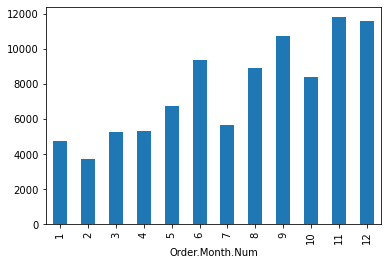

In [42]:
corporate_orders = orders[orders.Segment == "Corporate"]
corporate_orders_by_month = corporate_orders.groupby('Order.Month.Num')
_ = consumer_orders_by_month['Quantity'].agg(sum)
_.plot.bar()